In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import datetime
import os 



In [2]:
def read_file(result_folder,file):
    file_name = os.path.join(result_folder,file)
    file = open(file_name, 'rb')

    # dump information to that file
    data = pickle.load(file)

    # close the file
    file.close()

    return data['results'],data['config']

In [3]:
def order_file_names(files,lr_tup,s_tup):
    file_dict={}
    for lr in lr_tup:
        file1 = [file for file in files if file.find(f'lr:{lr}')>0]
        file_dict[f'{lr}']={}
        for s in s_tup:
            file2 = [file for file in file1 if file.find(f's:{s}_')>0]
            file_dict[f'{lr}'][f'{s}'] = file2[0]
    return file_dict

In [4]:
result_folder_full ='results_full_adap/'
files = [file for file in os.listdir(result_folder_full) if file.endswith('.pkl')]

lr_tup= (0.5,)
s_tup_full = (0.8,1,1.2)

full_file_dict = order_file_names(files,lr_tup,s_tup_full)
print(full_file_dict)

{'0.5': {'0.6': 'regret_T:1000_lr:0.5_s:0.6_05_09_14_23_22.pkl', '0.8': 'regret_T:1000_lr:0.5_s:0.8_05_09_14_25_43.pkl', '1': 'regret_T:1000_lr:0.5_s:1_05_09_14_26_22.pkl', '1.2': 'regret_T:1000_lr:0.5_s:1.2_05_09_14_27_02.pkl'}}


In [5]:
result_folder_bandit ='results_bandit_adap/'
files = [file for file in os.listdir(result_folder_bandit) if file.endswith('.pkl')]

lr_tup= (0.1,)
s_tup_ban = (0.8,1,1.2)

bandit_file_dict = order_file_names(files,lr_tup,s_tup_ban)
print(bandit_file_dict)

{'0.1': {'0.6': 'regret_T:1000_lr:0.10000_s:0.6_05_09_14_08_51.pkl', '0.8': 'regret_T:1000_lr:0.10000_s:0.8_05_09_14_09_31.pkl', '1': 'regret_T:1000_lr:0.10000_s:1_05_09_14_10_10.pkl', '1.2': 'regret_T:1000_lr:0.10000_s:1.2_05_09_14_10_50.pkl'}}


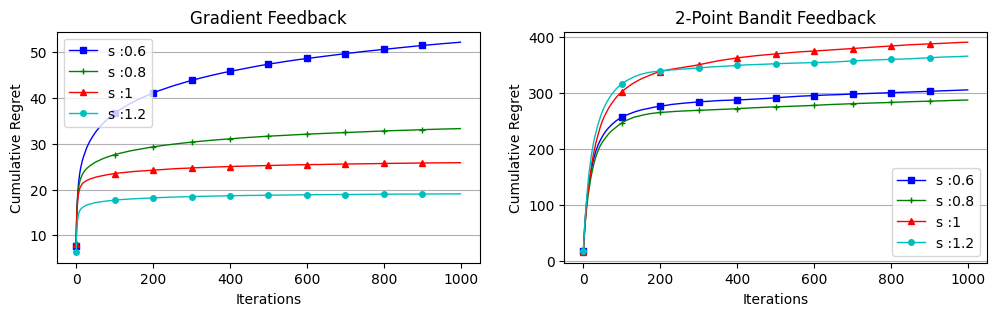

In [9]:

style = ['b-s','r-s','g-s','m-s','b-*','r-*','g-*','m-*','b-s','r-s','g-s','m-s','b-*','r-*','g-*','m-*']
markers=['s','+','^','o','v','2']
colors = ['b','g','r','c','m']

# fig, axs = plt.subplots(1, 5,figsize=(10, 8),sharey=True)
fig, axs = plt.subplots(1, 2,figsize=(12, 3))

lr_val = 0.5
    
for idx,s in enumerate(s_tup_full):
    file = full_file_dict[f'{lr_val}'][f'{s}']
    results,config = read_file(result_folder_full,file)

    regret = results['regret']
    actions = results['actions']
    sampled_points = results['points']
    lr = config['lr']
    s = config['s']
    # regret = compute_regret(actions,sampled_points)


    st = colors[idx]+'-'+markers[idx]
    label = f's :{s}'
    # ax1[0].plot(iterations,avg_grad_norm_pt,st,linewidth=1, markersize=4, markevery=20,label = label)
    reg = np.cumsum(regret)
    axs[0].plot(reg,st,linewidth=1, markersize=4, markevery=100,label = label)
    axs[0].set_title(f'Gradient Feedback')
    axs[0].legend()
    axs[0].set_xlabel('Iterations')
    axs[0].set_ylabel('Cumulative Regret')
    axs[0].grid(True,axis='y')


    # plt.title(f's = {s:.2f} Regret : {regret.sum():.4f}')


lr_val = 0.1
for idx,s in enumerate(s_tup_ban):
    file = bandit_file_dict[f'{lr_val}'][f'{s}']
    results,config = read_file(result_folder_bandit,file)

    regret = results['regret']
    actions = results['actions']
    sampled_points = results['points']
    lr = config['lr']
    s = config['s']
    # regret = compute_regret(actions,sampled_points)


    st = colors[idx]+'-'+markers[idx]
    label = f's :{s}'
    # ax1[0].plot(iterations,avg_grad_norm_pt,st,linewidth=1, markersize=4, markevery=20,label = label)
    reg = np.cumsum(regret)
    axs[1].plot(reg,st,linewidth=1, markersize=4, markevery=100,label = label)
    axs[1].set_title(f'2-Point Bandit Feedback')
    axs[1].legend()
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Cumulative Regret')
    axs[1].grid(True,axis='y')


# plt.title(lr_val)
# plt.legend()

# plt.savefig('figures/regret_full_sphere_1.pdf', format="pdf", bbox_inches="tight")
plt.show()
